<a href="https://colab.research.google.com/github/luckykhan386/pneumonia-detection-through-deep-learning-model/blob/main/pneumonia_detection_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
files.upload()

Saving kaggle (2).json to kaggle (2).json


{'kaggle (2).json': b'{"username":"luckykhan25bme10017","key":"931a463fbace824cafa751c5a4408902"}'}

In [11]:
# Install Kaggle API
!pip install -q kaggle



In [12]:
# Move kaggle(2).json to correct folder
!mkdir -p ~/.kaggle
!cp kaggle\(2\).json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle(2).json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [10]:
# Create the .kaggle directory
!mkdir -p ~/.kaggle

# Move the uploaded JSON file to the correct location and rename it
# *Replace YOUR_CORRECT_FILENAME.json with the actual name of your uploaded file*
# Common names are: kaggle.json, kaggle(1).json, kaggle(2).json, etc.
!cp YOUR_CORRECT_FILENAME.json ~/.kaggle/kaggle.json

# Set the correct permissions (this command should now work)
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'YOUR_CORRECT_FILENAME.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [9]:
# .kaggle डायरेक्टरी बनाएँ
!mkdir -p ~/.kaggle

# अपलोड की गई JSON फ़ाइल को सही जगह पर ले जाएँ और उसका नाम बदलें
# 'kaggle(2).json' को अपनी फ़ाइल के वास्तविक नाम से बदलें
!cp kaggle(2).json ~/.kaggle/kaggle.json

# सही परमिशन सेट करें
!chmod 600 ~/.kaggle/kaggle.json

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `cp kaggle(2).json ~/.kaggle/kaggle.json'
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [8]:
# Create the .kaggle directory
!mkdir -p ~/.kaggle

# Copy and rename the file (make sure you use the correct filename!)
!cp kaggle(2).json ~/.kaggle/kaggle.json

# Set the correct permissions
!chmod 600 ~/.kaggle/kaggle.json

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `cp kaggle(2).json ~/.kaggle/kaggle.json'
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [13]:
# Create the .kaggle directory
!mkdir -p ~/.kaggle

# Copy and rename the file
# सुनिश्चित करें कि 'kaggle(2).json' आपकी फ़ाइल का सही नाम है।
!cp kaggle(2).json ~/.kaggle/kaggle.json

# Set the correct permissions
!chmod 600 ~/.kaggle/kaggle.json

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `cp kaggle(2).json ~/.kaggle/kaggle.json'
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [17]:
# .kaggle डायरेक्टरी बनाएँ
!mkdir -p ~/.kaggle

In [23]:
!cp kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [24]:
!kaggle datasets list

ref                                                             title                                                    size  lastUpdated                 downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
sadiajavedd/students-academic-performance-dataset               Students_Academic_Performance_Dataset                    8907  2025-10-23 04:16:35.563000           8133        205  1.0              
zubairamuti/bmw-car-sales-record-2010-2024                      BMW Car Sales Record (2010-2024)                       853356  2025-11-19 04:50:35.480000            675         24  1.0              
ayeshaimran123/social-media-and-mental-health-balance           Social Media and Mental Health Balance                   5941  2025-10-26 07:51:53.380000           7531        104  1.0              
shahz

In [25]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
100% 2.29G/2.29G [00:35<00:00, 99.7MB/s]
100% 2.29G/2.29G [00:35<00:00, 69.6MB/s]


In [26]:
!unzip chest-xray-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

In [29]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt

In [31]:

DATA_DIR = 'chest_xray'

train_dir = os.path.join(DATA_DIR, 'train')
val_dir = os.path.join(DATA_DIR, 'val')
test_dir = os.path.join(DATA_DIR, 'test')

IMAGE_SIZE = (150, 150) # मॉडल के लिए इमेज का आकार
BATCH_SIZE = 32         # बैच साइज़

In [32]:

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)


test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)


test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [34]:
# मॉडल बनाना
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') # निमोनिया (1) या नहीं (0) के लिए Sigmoid
])

# मॉडल को कंपाइल करना
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# मॉडल को ट्रेनिंग देना (यह चलाने में समय लेगा!)
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE, # ट्रेनिंग के लिए कितने स्टेप्स
    epochs=10, # ट्रेनिंग साइकल
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 270s 2s/step - accuracy: 0.7349 - loss: 0.8130 - val_accuracy: 0.8125 - val_loss: 0.5290
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 262s 2s/step - accuracy: 0.9138 - loss: 0.2268 - val_accuracy: 0.8125 - val_loss: 0.2821
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 320s 2s/step - accuracy: 0.9220 - loss: 0.1946 - val_accuracy: 0.7500 - val_loss: 0.4535
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 270s 2s/step - accuracy: 0.9282 - loss: 0.1890 - val_accuracy: 0.8125 - val_loss: 0.3326
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 261s 2s/step - accuracy: 0.9357 - loss: 0.1659 - val_accuracy: 0.8125 - val_loss: 0.3876
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 268s 2s/step - accuracy: 0.9404 - loss: 0.1570 - val_accuracy: 0.8125 - val_loss: 0.3838
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 313s 2s/step - accuracy: 0.9468 - loss: 0.1447 - val_accuracy: 0.7500 - val_loss: 0.5485
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 270s 2s/step - accuracy: 0.9489 - loss: 0.1441 - val_accu

In [35]:
print("टेस्ट डेटा पर मॉडल का मूल्यांकन शुरू हो रहा है...")

# test_generator का उपयोग करें
loss, accuracy = model.evaluate(test_generator)

print(f"\n✅ टेस्ट लॉस (Test Loss): {loss:.4f}")
print(f"✅ टेस्ट एक्यूरेसी (Test Accuracy): {accuracy*100:.2f}%")

टेस्ट डेटा पर मॉडल का मूल्यांकन शुरू हो रहा है...
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 554ms/step - accuracy: 0.6651 - loss: 1.0481

✅ टेस्ट लॉस (Test Loss): 0.6074
✅ टेस्ट एक्यूरेसी (Test Accuracy): 81.73%


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2335 (\N{DEVANAGARI LETTER TTA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2381 (\N{DEVANAGARI SIGN VIRAMA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2352 (\N{DEVANAGARI LETTER RA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2375 (\N{DEVANAGARI VOWEL SIGN E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/l

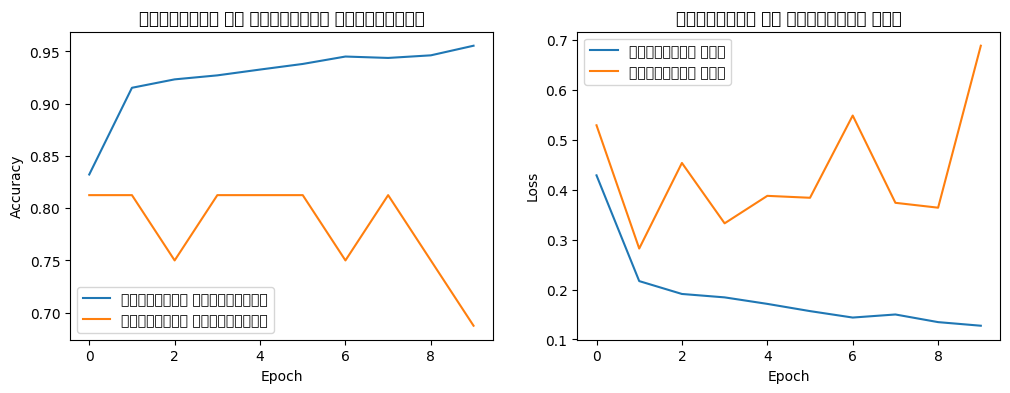

In [36]:
import matplotlib.pyplot as plt

# ट्रेनिंग और वैलिडेशन एक्यूरेसी प्लॉट करें
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='ट्रेनिंग एक्यूरेसी')
plt.plot(history.history['val_accuracy'], label='वैलिडेशन एक्यूरेसी')
plt.title('ट्रेनिंग और वैलिडेशन एक्यूरेसी')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# ट्रेनिंग और वैलिडेशन लॉस प्लॉट करें
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='ट्रेनिंग लॉस')
plt.plot(history.history['val_loss'], label='वैलिडेशन लॉस')
plt.title('ट्रेनिंग और वैलिडेशन लॉस')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [39]:
# मॉडल को HDF5 फॉर्मेट में सेव करें
model.save('pneumonia_detection_model.h5')
print("मॉडल सफलतापूर्वक 'pneumonia_detection_model.h5' नाम से सेव हो गया है।")

मॉडल सफलतापूर्वक 'pneumonia_detection_model.h5' नाम से सेव हो गया है।


In [41]:
import numpy as np
from tensorflow.keras.preprocessing import image
import os

def predict_pneumonia(image_path, model):
    # इमेज को 150x150 साइज़ में लोड करें
    img = image.load_img(image_path, target_size=(150, 150))
    # इमेज को NumPy ऐरे में बदलें
    img_array = image.img_to_array(img)
    # 4D ऐरे बनाएं (Batch size, Height, Width, Channels)
    img_array = np.expand_dims(img_array, axis=0)
    # पिक्सल वैल्यू को 0-1 के बीच रीस्केल करें (जैसा ट्रेनिंग में किया था)
    img_array /= 255.0

    # प्रेडिक्शन करें
    prediction = model.predict(img_array)

    # Sigmoid आउटपुट को 0 या 1 में बदलें (threshold 0.5)
    if prediction[0][0] >= 0.5:
        result = "PNEUMONIA"
        probability = prediction[0][0] * 100
    else:
        result = "NORMAL"
        probability = (1 - prediction[0][0]) * 100

    return result, probability, img

In [42]:
# टेस्ट सेट में किसी एक PNEUMONIA इमेज का पाथ
# आपको अपने फ़ोल्डर स्ट्रक्चर के हिसाब से सही पाथ डालना होगा।
# उदाहरण पाथ (आपके अनज़िप किए गए डेटासेट के आधार पर):
test_image_path = os.path.join(test_dir, 'PNEUMONIA', 'person1_testing_10.jpeg')
# सुनिश्चित करें कि यह फ़ाइल आपके सिस्टम में मौजूद हो!

# यदि आपको पता है कि फ़ाइल कहाँ है, तो उस पाथ का उपयोग करें।
# उदाहरण के लिए, Colab में अपलोड की गई कोई इमेज:
# test_image_path = '/content/uploaded_xray_image.jpg'


if os.path.exists(test_image_path):
    result, prob, img = predict_pneumonia(test_image_path, model)

    # परिणाम दिखाएं
    plt.imshow(img)
    plt.title(f"Prediction: {result} (Confidence: {prob:.2f}%)")
    plt.axis('off')
    plt.show()
else:
    print(f"Error: फ़ाइल नहीं मिली -> {test_image_path}")

Error: फ़ाइल नहीं मिली -> chest_xray/test/PNEUMONIA/person1_testing_10.jpeg


In [43]:
!ls

chest_xray		  kaggle.json			sample_data
chest-xray-pneumonia.zip  pneumonia_detection_model.h5


In [44]:
# यह जाँचने के लिए कि 'test' फ़ोल्डर कहाँ है
!ls chest_xray

chest_xray  __MACOSX  test  train  val


In [45]:
# 'test/PNEUMONIA' फ़ोल्डर के अंदर की फ़ाइलें देखें
!ls chest_xray/test/PNEUMONIA | head -n 5

person100_bacteria_475.jpeg
person100_bacteria_477.jpeg
person100_bacteria_478.jpeg
person100_bacteria_479.jpeg
person100_bacteria_480.jpeg


In [47]:
import os

# सुनिश्चित करें कि यह आपके अनज़िप किए गए मुख्य फ़ोल्डर का सही नाम है
DATA_DIR = 'chest_xray'

# टेस्ट फ़ोल्डर का पाथ
test_dir = os.path.join(DATA_DIR, 'test')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


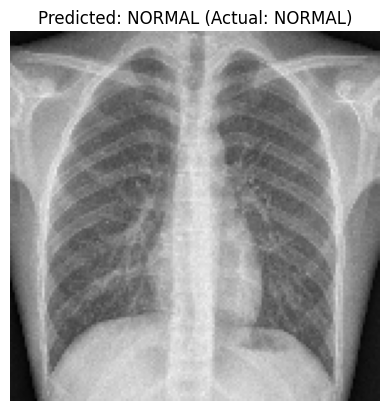

In [49]:
# test_generator से पहली इमेज और लेबल लें
test_images, test_labels = next(test_generator)
# test_images[0] पहली इमेज है

# प्रेडिक्शन करें
predictions = model.predict(test_images)

# पहली इमेज का परिणाम (Prediction)
predicted_class_index = (predictions[0][0] > 0.5).astype(int)

# 0 (NORMAL) या 1 (PNEUMONIA) क्लास का नाम खोजें
class_labels = list(test_generator.class_indices.keys())
predicted_label = class_labels[predicted_class_index]
actual_label = class_labels[int(test_labels[0])]

# --- सुधार यहाँ है ---
# इमेज डेटा को 0-255 रेंज में वापस लाएं और uint8 टाइप में बदलें ताकि Plotting सही हो
image_to_plot = (test_images[0] * 255).astype(np.uint8)

# परिणाम दिखाएं plt.figure(figsize=(5, 5))
plt.imshow(image_to_plot) # प्लॉटिंग के लिए सुधरी हुई इमेज का उपयोग करें
plt.title(f"Predicted: {predicted_label} (Actual: {actual_label})")
plt.axis('off')
plt.show()

In [50]:
import tensorflow as tf

# मॉडल को HDF5 फ़ाइल से लोड करें
loaded_model = tf.keras.models.load_model('pneumonia_detection_model.h5')

print("मॉडल सफलतापूर्वक लोड हो गया है।")

मॉडल सफलतापूर्वक लोड हो गया है।


In [51]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# टेस्ट जनरेटर से सभी प्रेडिक्शन प्राप्त करें
test_generator.reset() # जनरेटर को शुरुआत में रीसेट करें
Y_pred = loaded_model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)

# प्रेडिक्शन को बाइनरी क्लास (0 या 1) में बदलें
y_pred_classes = (Y_pred > 0.5).astype(int)

# वास्तविक लेबल्स प्राप्त करें
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# 1. कन्फ्यूजन मैट्रिक्स
print("### कन्फ्यूजन मैट्रिक्स ###")
conf_matrix = confusion_matrix(true_classes, y_pred_classes)
print(conf_matrix)

# 2. क्लासिफिकेशन रिपोर्ट
print("\n### क्लासिफिकेशन रिपोर्ट ###")
report = classification_report(true_classes, y_pred_classes, target_names=class_labels)
print(report)

20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 691ms/step
### कन्फ्यूजन मैट्रिक्स ###
[[125 109]
 [  5 385]]

### क्लासिफिकेशन रिपोर्ट ###
              precision    recall  f1-score   support

      NORMAL       0.96      0.53      0.69       234
   PNEUMONIA       0.78      0.99      0.87       390

    accuracy                           0.82       624
   macro avg       0.87      0.76      0.78       624
weighted avg       0.85      0.82      0.80       624



कुल गलत प्रेडिक्शन: 166296


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2327 (\N{DEVANAGARI LETTER GA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2354 (\N{DEVANAGARI LETTER LA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2340 (\N{DEVANAGARI LETTER TA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2352 (\N{DEVANAGARI LETTER RA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/pyt

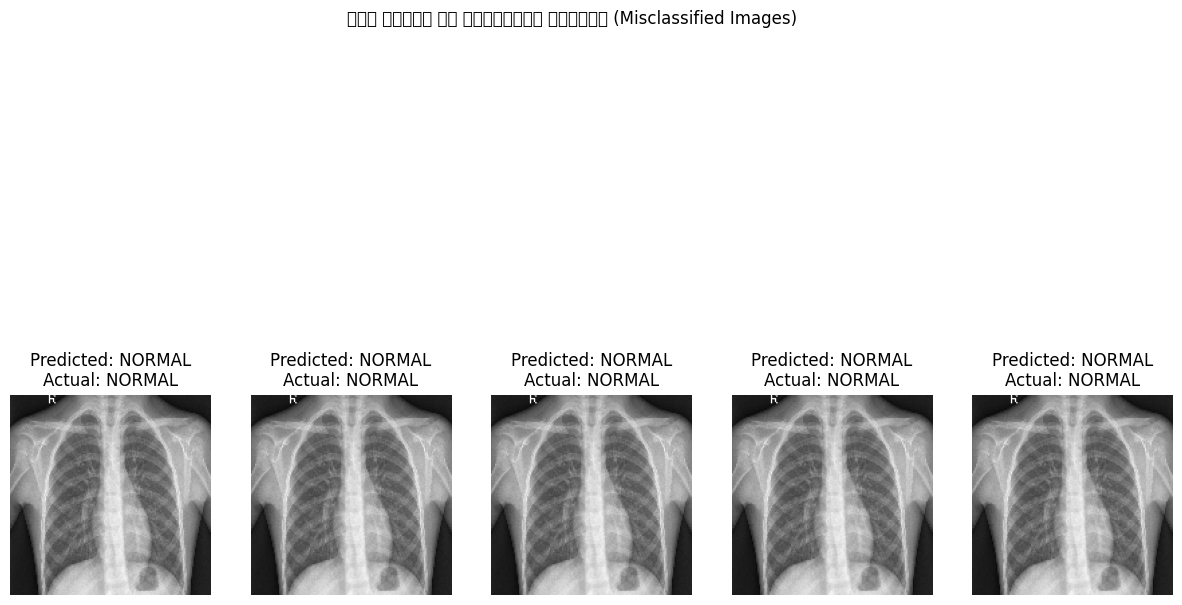

In [52]:
# यह कोड गलत प्रेडिक्शन वाली कुछ इमेजेज को दिखाता है
import numpy as np
import matplotlib.pyplot as plt

# पिछली प्रेडिक्शन और वास्तविक लेबल्स का उपयोग करें (Step 2 से)
# y_pred_classes, true_classes, test_generator, class_labels

# गलत प्रेडिक्शन वाली इमेजेज के इंडेक्स ढूंढें
incorrect_indices = np.where(y_pred_classes != true_classes)[0]

print(f"कुल गलत प्रेडिक्शन: {len(incorrect_indices)}")

# 5 गलत प्रेडिक्शन वाली इमेजेज दिखाएं
plt.figure(figsize=(15, 10))
for i, incorrect in enumerate(incorrect_indices[:5]):
    plt.subplot(1, 5, i + 1)

    # टेस्ट जनरेटर से इमेज प्राप्त करें (थोड़ा जटिल है, इसलिए हम जनरेटर का उपयोग करते हैं)
    # यह सिर्फ 5 गलत इमेजेज दिखाने का एक तरीका है:

    # वास्तविक इमेज को प्लॉट करने के लिए (यह कोड थोड़ा लंबा है, लेकिन आवश्यक है)
    sample_index = incorrect

    # जनरेटर से बैच इंडेक्स और इमेज इंडेक्स की गणना
    batch_index = sample_index // test_generator.batch_size
    in_batch_index = sample_index % test_generator.batch_size

    # उस बैच को दोबारा प्राप्त करें
    test_generator.reset()
    for j in range(batch_index + 1):
        x_batch, y_batch = next(test_generator)

    # इमेज को प्लॉट करें
    image_to_plot = (x_batch[in_batch_index] * 255).astype(np.uint8)

    plt.imshow(image_to_plot)
    plt.title(f"Predicted: {class_labels[y_pred_classes[incorrect][0]]}\nActual: {class_labels[true_classes[incorrect]]}")
    plt.axis('off')

plt.suptitle("गलत तरीके से वर्गीकृत इमेजेज (Misclassified Images)")
plt.show()